<a href="https://colab.research.google.com/github/shreya0202/Extreme-Learning-Machine/blob/main/ELM_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pyswarms

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import time
import pyswarms as ps
from pyswarms.backend.topology import Pyramid
from pyswarms.single.global_best import GlobalBestPSO

In [ ]:
def make_half_moons(n_samples, radius, width, distance):
    # Initialise dummy variables
    num_rows = 3
    num_cols = n_samples
    r = radius
    w = width
    d = distance
    
    # Check for boundary conditions
    if(r < w/2):
        print("\nError: Radius should atleast be larger than half the width.")
            
    if(num_cols%2 != 0):
        print("\nError: Number of samples should be even.")
        num_cols -= 1
    
    # Create random 2D array of floats between 0.0 and 1.0
    a = np.random.rand(num_rows, num_cols//2)
    
    # Define rad for first half of records
    rad = (r - w/2) + w*a[0][:]
    
    # Define theta for second half of records
    theta = np.pi*a[1][:]
    
    # Create data-set
    # First half-moon data
    x1 = np.multiply(rad, np.cos(theta))
    y1 = np.multiply(rad, np.sin(theta))
    label1 = 1*np.ones((1, len(x1)), dtype=int)
    label1 = np.hstack(label1)
    
    # Second half-moon data
    x2 = np.multiply(rad, np.cos(-theta)) + r
    y2 = np.multiply(rad, np.sin(-theta)) - d
    label2 = 0*np.ones((1, len(x2)), dtype=int)
    label2 = np.hstack(label2)
    
    # Create dataset by combining all values of x's and y's and
    # labels, and shuffling them randomly.
    x = np.concatenate((x1, x2))
    y = np.concatenate((y1, y2))
    labels = np.concatenate((label1, label2))
    
    # Create coordinate-type dataset from individual values
    # so that we have a dataset of type Xi = [[x, y], label]
    X = np.zeros((len(x), 2))
    k = 0
    for i, j in zip(x, y):
        X[k][0] = i
        X[k][1] = j
        k += 1

    data_set = [X, labels]
        
    # Plot a half-moon graph for given dataset
    plt.plot(x1, y1, "r.", x2, y2, "b.")
    plt.show()
    
    return data_set

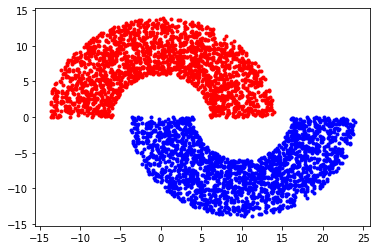

In [ ]:
# Create data by calling make_half_moons method
data = make_half_moons(4000, 10, 8, 0)
# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(data[0], data[1], test_size=0.5, random_state=42)

In [ ]:
x_train.shape

(2000, 2)

In [ ]:
y_train.shape

(2000,)

In [ ]:
def first_step(x, input_wt):
    a = np.dot(x, input_wt)
    a = np.maximum(a, 0) # ReLU activation  # check if needed 3rd arg
    return a

In [ ]:
# Visualization of accuracies
def visualize(hnode, acc):
  import matplotlib.pyplot as plt
  x_s = hnode 
  y_s = acc

  plt.plot(x_s, y_s, '-b', label='Train Accuracies')
  plt.legend(loc='lower right')
  plt.xlabel("Number of Hidden Nodes")
  plt.ylabel("Training Accuracies")
  plt.show()

In [ ]:
def training(x):
  random_nodes = 0
  initial_weight = []
  nodes = []
  accuracies = []
  accuracy_ = 0
  start_time = time.time() # Initializing start time
  while (accuracy_ < 95 and random_nodes < 100):
      random_nodes += 1 # Increase by 1 the random hidden node
      nodes.append(random_nodes)
      print("The added hidden node is = {}".format(random_nodes))   
      rand_wt = np.random.rand(len(np.transpose(x)), 1) #random wt initialized
      if (random_nodes == 1):
          initial_weight = rand_wt
      else:    
          initial_weight = np.hstack((initial_weight, rand_wt)) # stacking the sequence of input arrays into single weight array
      H = first_step(x, initial_weight)
      # print('H- shape for {} nodes = {}'.format(random_nodes, np.shape(H)))
      # print("First ", H)
      Ht = np.transpose(H)
      hinv = np.linalg.pinv(H)
      beta_wt = np.dot(hinv, y_train)
      # print("Beta ", beta_wt)
      d = np.dot(H, beta_wt)  
      correct = 0
      total = y_train.shape[0]
      for i in range(total):
          if d[i] > 0.5:
              predicted = 1
          else:
              predicted = 0
          test = y_train[i]
          if predicted == test:
              correct += 1
      
      # print("correct: ", correct)
      # Accuracy Calculated       
      accuracy_ = np.round((correct/total) * 100, 2)
      accuracies.append(accuracy_)
      if(random_nodes%10 == 0):
                print("\n For {} hidden-nodes the training classification accuracy is: {}%\n".format(random_nodes, accuracy_))
  stop_time = time.time()
  print("\nTotal hidden nodes at the end is: {}".format(random_nodes))
  print("\nTraining time: {} seconds".format(np.round((stop_time - start_time), 3)))
  # visualize(nodes, accuracies)

  return random_nodes, initial_weight, beta_wt, accuracies, nodes

In [ ]:
def testing(random_nodes, initial_weight, beta_wt):
  start_test_time = time.time()
  h_nodes = random_nodes
  H_test = first_step(x_test, initial_weight)
  d = np.dot(H_test, beta_wt) # Output Weight 
  correct = 0
  total = d.shape[0]
  for i in range(total):
      if d[i] > 0.5:
          predicted = 1
      else:
          predicted = 0
      test = y_test[i]
      if predicted == test:
          correct += 1
  
  # print("correct: ", correct)
  # Accuracy Calculated       
  accuracy_ = np.round((correct/total) * 100, 2)
  print("Accuracy : ", accuracy_)
  stop_test_time = time.time()
  print("For {} hidden-nodes the testing classification accuracy : {}%".format(h_nodes, accuracy_))
  print("\nTesting time: {} seconds".format(np.round((stop_test_time - start_test_time), 3)))

-----Non Optimal Training----

The added hidden node is = 1
The added hidden node is = 2
The added hidden node is = 3
The added hidden node is = 4
The added hidden node is = 5
The added hidden node is = 6
The added hidden node is = 7
The added hidden node is = 8
The added hidden node is = 9
The added hidden node is = 10

 For 10 hidden-nodes the training classification accuracy is: 85.95%

The added hidden node is = 11
The added hidden node is = 12
The added hidden node is = 13
The added hidden node is = 14
The added hidden node is = 15
The added hidden node is = 16
The added hidden node is = 17
The added hidden node is = 18
The added hidden node is = 19
The added hidden node is = 20

 For 20 hidden-nodes the training classification accuracy is: 86.2%

The added hidden node is = 21
The added hidden node is = 22
The added hidden node is = 23
The added hidden node is = 24
The added hidden node is = 25
The added hidden node is = 26
The added hidden node is = 27
The added hidden node is = 

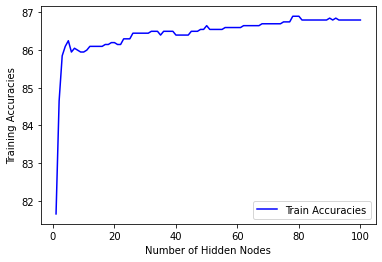


----Non Optimal Testing-----

Accuracy :  86.75
For 100 hidden-nodes the testing classification accuracy : 86.75%

Testing time: 0.011 seconds


In [ ]:
print("-----Training----")
print()
final_random_nodes, final_init_wt, final_beta_wt, final_accuracies, node_list = training(x_train)
print()
visualize(node_list, final_accuracies)
print()
print("----Testing-----")
print()
testing(final_random_nodes, final_init_wt, final_beta_wt)

In [ ]:
# options = {'c1': 1, 'c2': 3, 'w': 1}
# # my_topology = Pyramid(static=False)

# # Call instance of PSO
# # dimensions = (n_inputs * n_hidden) + (n_hidden * n_classes) + n_hidden + n_classes
# optimizer = GlobalBestPSO(n_particles=x_train.shape[0], dimensions=x_train.shape[1],
#                                     options=options)
# print()
# print()
# # Perform optimization
# print("-----Optimal Training----")
# print()
# op_random_nodes, op_init_wt, op_beta_wt, op_accuracies, node_list = optimizer.optimize(training, iters = 1000)
# print()
# visualize(node_list, op_accuracies)
# print()
# print("----Optimal Testing-----")
# print()
# testing(op_random_nodes, op_init_wt, op_beta_wt)